# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant maching learning problems with a unique dataset that will put your modeling skills to the test. Subscription services are leveraged by companies across many industries, from fitness to video streaming to retail. One of the primary objectives of companies with subscription services is to decrease churn and ensure that users are retained as subscribers. In order to do this efficiently and systematically, many companies employ machine learning to predict which users are at the highest risk of churn, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the churn prediction problem on a very unique and interesting group of subscribers on a video streaming service! 

Imagine that you are a new data scientist at this video streaming company and you are tasked with building a model that can predict which existing subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the customer completes all content they were interested in, and no longer need the subscription
* the customer finds themselves to be too busy and cancels their subscription until a later time
* the customer determines that the streaming service is not the best fit for them, so they cancel and look for something better suited

Regardless the reason, this video streaming company has a vested interest in understanding the likelihood of each individual customer to churn in their subscription so that resources can be allocated appropriately to support customers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past subscriptions of a video streaming platform that contain information about the customer, the customers streaming preferences, and their activity in the subscription thus far. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (243,787 subscriptions to be exact) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (104,480 subscriptions to be exact), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique subscription. For each subscription, a single observation (`CustomerID`) is included during which the subscription was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Churn`.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [1]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly basis.
2,TotalCharges,Feature,float,The total charges incurred by the user over the account's lifetime.
3,SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paperless billing (Yes or No).
6,ContentType,Feature,string,"The type of content preferred by the user (Movies, TV Shows, or Both)."
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the service on multiple devices (Yes or No).
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV, Mobile, Tablet, or Computer)."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching content per week.


## How to Submit your Predictions
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 104,480 rows (plus a header row). The first column should be `CustomerID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likellihood that the subscription will churn__.

Your submission will show an error if you have extra columns (beyond `CustomerID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which subscriptions will be retained, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [2]:
# Data packages
import pandas as pd
import numpy as np
import os

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Import any other packages you may want to use
num = os.cpu_count()
print(num)

8


## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [4]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:',train_df.shape)
train_df.head()

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [5]:
train_df.columns

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating',
       'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl',
       'SubtitlesEnabled', 'CustomerID', 'Churn'],
      dtype='object')

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

In [7]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:'test_df.shape)
test_df.head()

test_df Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [8]:
# your code here (optional)
train_df.drop("CustomerID",axis=1,inplace=True)
train_df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,63.531377,10,Sci-Fi,2.176498,4,Male,3,No,No,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,25.725595,18,Action,3.478632,8,Male,23,No,Yes,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,57.364061,23,Fantasy,4.238824,6,Male,1,Yes,Yes,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,131.537507,30,Drama,4.276013,2,Male,24,Yes,Yes,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,45.356653,20,Comedy,3.616170,4,Female,0,No,No,0


In [9]:
train_df["Churn"].value_counts()

Churn
0    199605
1     44182
Name: count, dtype: int64

In [10]:
train_df.isna().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
Churn                       0
dtype: int64

Show Columns unique Values

In [11]:
def printAllColumnsUniqueValues(df):
    for col in df:
        print(f'{col}:{df[col].unique()}')
printAllColumnsUniqueValues(train_df)

AccountAge: [ 20  57  73  32 113  38  25  26  14 114   3  64  43  98  47  11  50   5
  63  55  84  16  80 116  33  86  52  77   4  91 119  72  94  99  40  60
 105  54  34  67  49 100   6  97  24  53  82  18   8  29   9 101  30  74
  17  69  61  65  96  62  35  51 109  76   2  42 111  68  15  27  58 103
  45  36  85 107 115  81 106  70  46  83  92   1  44 118  23  88   7  31
  71  48  93 117  95  37 112  21 108  19  12  78 104  87  90 110  56  79
  41  13  28  10  59  39  75 102  89  66  22]
MonthlyCharges: [11.0552151   5.17520846 12.10665687 ... 14.51456873 18.14055532
 11.59377449]
TotalCharges: [ 221.10430197  294.98688225  883.78595161 ... 1640.14626689  126.98388725
 1043.4397042 ]
SubscriptionType: ['Premium' 'Basic' 'Standard']
PaymentMethod: ['Mailed check' 'Credit card' 'Electronic check' 'Bank transfer']
PaperlessBilling: ['No' 'Yes']
ContentType: ['Both' 'Movies' 'TV Shows']
MultiDeviceAccess: ['No' 'Yes']
DeviceRegistered: ['Mobile' 'Tablet' 'Computer' 'TV']
ViewingHoursPer

In [12]:
printAllColumnsUniqueValues(test_df)

AccountAge: [ 38  77   5  88  91 103  22  21  86 104  20  94 106  30 108  27  64  83
  44  16  26  61   7  23  81   9  75  17  62  69  11  31  67  45 113  79
  82  10  95  84  50  58 101 110  28 102  90  37  76  73  53   6  92  12
  57  36  18 111  97 119  39 114  72  93  65  89  66 100  87 116 109  29
  49  56  68  19  78   2  70  41  33  60  13  99 105  54  47   4  98  43
  35  42 107  80  96  52   1  40  55  63  48  85  15  24 117 118   8  51
  74  34 112  25  71  46 115  59   3  14  32]
MonthlyCharges: [17.86937354  9.91285413 15.01901132 ... 18.13434307 19.77400987
  7.43838545]
TotalCharges: [ 679.03619453  763.28976817   75.09505659 ... 1922.2403651   909.60445412
  818.22239896]
SubscriptionType: ['Premium' 'Basic' 'Standard']
PaymentMethod: ['Mailed check' 'Electronic check' 'Bank transfer' 'Credit card']
PaperlessBilling: ['No' 'Yes']
ContentType: ['TV Shows' 'Both' 'Movies']
MultiDeviceAccess: ['No' 'Yes']
DeviceRegistered: ['TV' 'Computer' 'Tablet' 'Mobile']
ViewingHoursPer

In [13]:
def printUniqueValues(df):
    for col in df:
        if df[col].dtype == 'object':
            print(f'{col}: {df[col].unique()}')
printUniqueValues(train_df)

SubscriptionType: ['Premium' 'Basic' 'Standard']
PaymentMethod: ['Mailed check' 'Credit card' 'Electronic check' 'Bank transfer']
PaperlessBilling: ['No' 'Yes']
ContentType: ['Both' 'Movies' 'TV Shows']
MultiDeviceAccess: ['No' 'Yes']
DeviceRegistered: ['Mobile' 'Tablet' 'Computer' 'TV']
GenrePreference: ['Sci-Fi' 'Action' 'Fantasy' 'Drama' 'Comedy']
Gender: ['Male' 'Female']
ParentalControl: ['No' 'Yes']
SubtitlesEnabled: ['No' 'Yes']


<h1> EDA Dataset <h1>

<Axes: title={'center': 'Churn Counts'}, xlabel='Churn'>

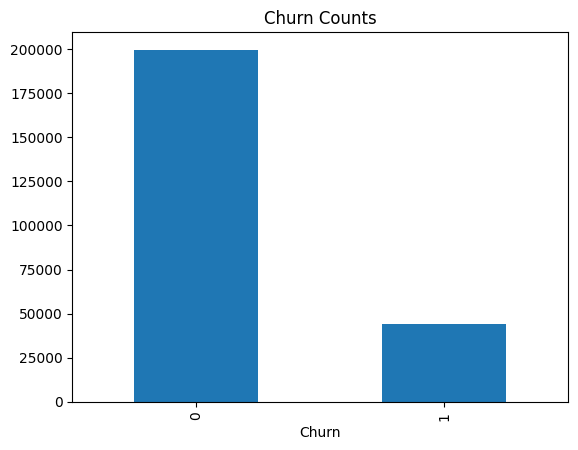

In [14]:
train_df["Churn"].value_counts().plot(kind='bar',title='Churn Counts')

In [15]:
noChurn = train_df[train_df["Churn"]==0]
yesChurn = train_df[train_df["Churn"]==1]

In [16]:
noChurn.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,199605.000000,199605.000000,199605.000000,199605.000000,199605.000000,199605.000000,199605.000000,199605.000000,199605.000000,199605.0
mean,63.273290,12.286129,780.402245,21.182697,95.754533,25.383853,2.990688,4.390576,11.944941,0.0
std,33.953685,4.317675,524.200292,11.198072,50.281449,14.358435,1.155398,2.866237,7.197050,0.0
min,1.000000,4.990062,4.999861,1.000133,5.000547,0.000000,1.000039,0.000000,0.000000,0.0
25%,35.000000,8.532456,362.799813,11.601957,52.664521,13.000000,1.986598,2.000000,6.000000,0.0
50%,65.000000,12.189954,684.445761,21.545178,97.505261,26.000000,2.983423,4.000000,12.000000,0.0
75%,93.000000,15.993218,1124.699587,30.931229,139.403329,38.000000,3.989193,7.000000,18.000000,0.0
max,119.000000,19.989957,2378.723844,39.999723,179.999275,49.000000,4.999982,9.000000,24.000000,0.0


In [17]:
yesChurn.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,44182.000000,44182.000000,44182.000000,44182.000000,44182.000000,44182.000000,44182.000000,44182.000000,44182.000000,44182.0
mean,45.674121,13.414880,616.737816,17.427741,76.494840,20.526323,3.057037,5.017451,12.350867,1.0
std,32.001262,4.251322,496.333924,10.932147,48.466716,14.028993,1.153083,2.844926,7.165535,0.0
min,1.000000,4.990112,4.991154,1.000065,5.002643,0.000000,1.000007,0.000000,0.000000,1.0
25%,18.000000,9.963733,218.502198,7.898715,34.398096,8.000000,2.065083,3.000000,6.000000,1.0
50%,40.000000,13.855745,488.927265,16.079108,69.772525,19.000000,3.084849,5.000000,13.000000,1.0
75%,69.000000,17.132808,903.552235,26.218169,114.371954,32.000000,4.057920,8.000000,19.000000,1.0
max,119.000000,19.989741,2356.614662,39.997750,179.991594,49.000000,4.999989,9.000000,24.000000,1.0


(array([[21479., 20934., 20877., 20391., 20102., 19566., 19775., 19421.,
         18872., 18188.],
        [ 3061.,  3281.,  3526.,  3884.,  4275.,  4477.,  4841.,  5269.,
          5621.,  5947.]]),
 array([ 4.99006155,  6.49005108,  7.99004061,  9.49003014, 10.99001967,
        12.49000921, 13.98999874, 15.48998827, 16.9899778 , 18.48996734,
        19.98995687]),
 <a list of 2 BarContainer objects>)

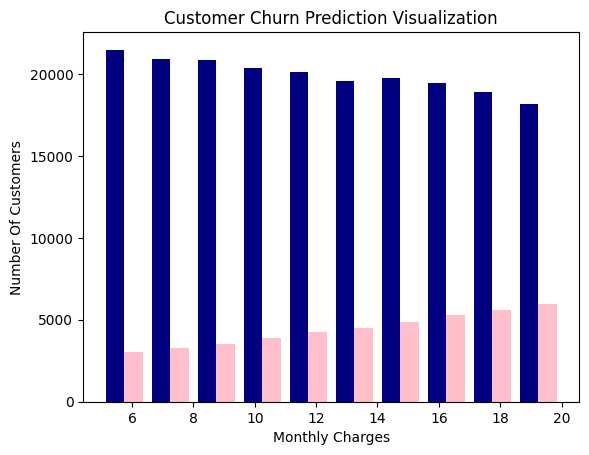

In [18]:
plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualization")
plt.hist([noChurn.MonthlyCharges,yesChurn.MonthlyCharges],color=['navy','pink'],label=['Churn=No','Churn=Yes'])

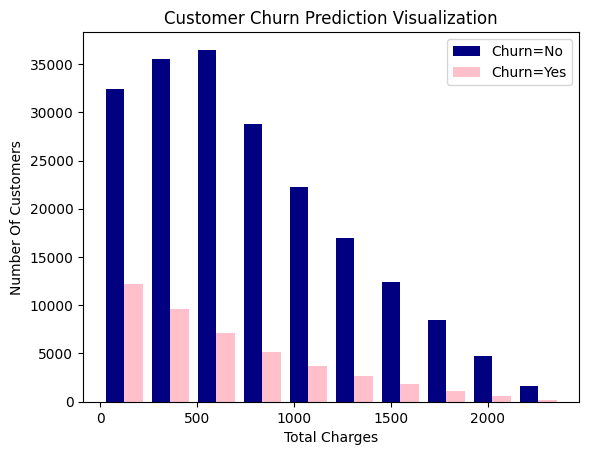

In [19]:
plt.xlabel("Total Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualization")
plt.hist([noChurn.TotalCharges,yesChurn.TotalCharges],color=['navy','pink'],label=['Churn=No','Churn=Yes'])
plt.legend()

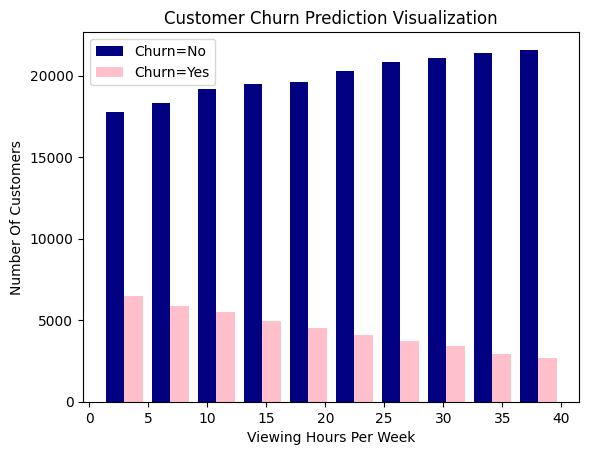

In [20]:
plt.xlabel("Viewing Hours Per Week")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualization")
plt.hist([noChurn.ViewingHoursPerWeek,yesChurn.ViewingHoursPerWeek],color=['navy','pink'],label=['Churn=No','Churn=Yes'])
plt.legend()

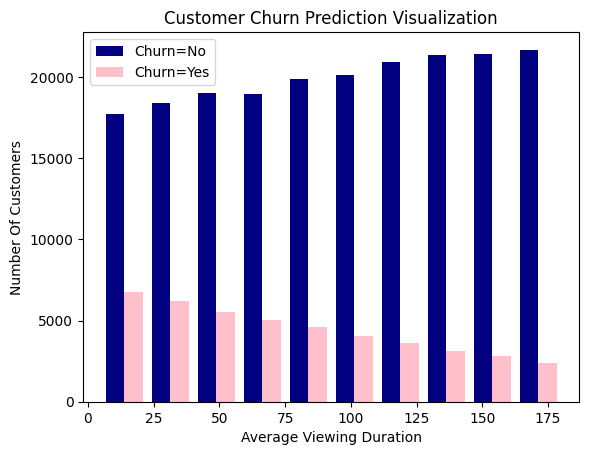

In [21]:
plt.xlabel("Average Viewing Duration")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualization")
plt.hist([noChurn.AverageViewingDuration,yesChurn.AverageViewingDuration],color=['navy','pink'],label=['Churn=No','Churn=Yes'])
plt.legend()

<h1> Data Cleaning <h1>

Convert yes or no unique values to 1 or 0, OneHotEncoding

In [22]:
yesNoColumns = ["PaperlessBilling","MultiDeviceAccess","ParentalControl","SubtitlesEnabled"]
columnsForOneHotEncoding = ["SubscriptionType","PaymentMethod","ContentType","DeviceRegistered","GenrePreference"]
columnsToScale = ["AccountAge","MonthlyCharges", "TotalCharges", "ViewingHoursPerWeek", "AverageViewingDuration", 
                  "ContentDownloadsPerMonth", "UserRating", "SupportTicketsPerMonth" ]

In [23]:
train_df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,63.531377,10,Sci-Fi,2.176498,4,Male,3,No,No,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,25.725595,18,Action,3.478632,8,Male,23,No,Yes,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,57.364061,23,Fantasy,4.238824,6,Male,1,Yes,Yes,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,131.537507,30,Drama,4.276013,2,Male,24,Yes,Yes,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,45.356653,20,Comedy,3.616170,4,Female,0,No,No,0


In [24]:
printUniqueValues(train_df)

SubscriptionType: ['Premium' 'Basic' 'Standard']
PaymentMethod: ['Mailed check' 'Credit card' 'Electronic check' 'Bank transfer']
PaperlessBilling: ['No' 'Yes']
ContentType: ['Both' 'Movies' 'TV Shows']
MultiDeviceAccess: ['No' 'Yes']
DeviceRegistered: ['Mobile' 'Tablet' 'Computer' 'TV']
GenrePreference: ['Sci-Fi' 'Action' 'Fantasy' 'Drama' 'Comedy']
Gender: ['Male' 'Female']
ParentalControl: ['No' 'Yes']
SubtitlesEnabled: ['No' 'Yes']


Balance the training data

In [25]:
len(yesChurn),len(noChurn)

(44182, 199605)

In [26]:
sampledNoChurn = noChurn.sample(n=len(yesChurn),random_state=42)
sampledNoChurn.shape

(44182, 20)


combine undersample no churn with yes churn become balanced training data

In [27]:

balanceTrainDF = pd.concat([sampledNoChurn, yesChurn], axis=0)
balanceTrainDF.shape

(88364, 20)

<Axes: title={'center': 'Churn Counts'}, xlabel='Churn'>

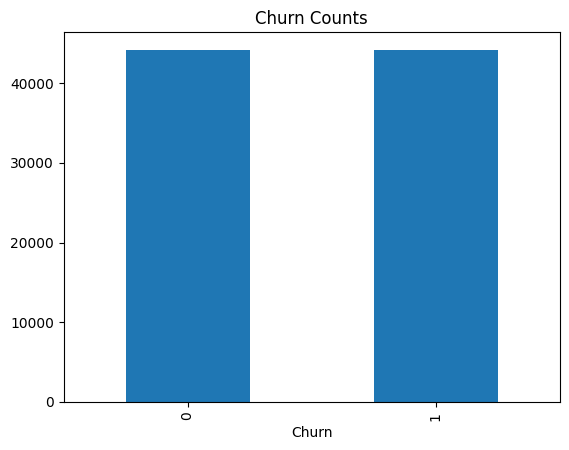

In [28]:
balanceTrainDF["Churn"].value_counts().plot(kind='bar',title='Churn Counts')

In [29]:
balanceTrainDF = balanceTrainDF.sample(frac=1).reset_index(drop=True)

In [30]:
balanceTrainDF.head(20)

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,Churn
0,100,6.382099,638.209851,Standard,Mailed check,Yes,Movies,Yes,Mobile,13.558795,67.344635,29,Fantasy,4.929052,1,Female,8,No,Yes,0
1,62,12.147090,753.119563,Standard,Credit card,No,Both,No,Computer,10.750916,67.016568,29,Action,2.470423,9,Male,8,Yes,Yes,1
2,65,19.315954,1255.536983,Standard,Mailed check,No,Movies,No,TV,35.356669,112.805937,30,Comedy,1.668903,6,Male,23,Yes,Yes,0
3,15,11.651281,174.769219,Premium,Bank transfer,No,TV Shows,No,Tablet,17.110208,25.341319,22,Drama,4.958553,2,Male,1,Yes,Yes,1
4,94,12.211412,1147.872720,Premium,Credit card,No,TV Shows,No,Mobile,23.910299,40.974789,23,Action,1.360940,5,Male,21,No,No,1
5,61,19.968608,1218.085100,Standard,Credit card,Yes,Both,Yes,Tablet,23.991357,104.116556,9,Action,1.747213,5,Female,14,Yes,No,0
6,99,17.133087,1696.175595,Basic,Bank transfer,No,Movies,No,TV,3.801652,125.026975,36,Drama,1.360465,7,Female,19,Yes,No,0
7,9,15.566695,140.100256,Premium,Credit card,Yes,TV Shows,Yes,Tablet,32.930495,148.833106,46,Drama,1.851547,0,Female,6,No,No,0
8,6,6.951317,41.707900,Premium,Bank transfer,Yes,Both,No,Tablet,7.295754,66.322293,6,Fantasy,3.479891,8,Male,9,Yes,Yes,1
9,72,13.734818,988.906915,Basic,Credit card,Yes,Movies,No,TV,3.085521,12.069654,39,Drama,1.731467,8,Male,17,No,Yes,1



<h2>Convert Gender column to 1 or 0, Create One-hot Encoding for several columns<h2>

In [31]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
def preprocessData(df, scale=True):
    for col in yesNoColumns:
        df[col].replace({'Yes': 1,'No': 0},inplace=True)
    df.Gender.replace({"Male": 1,"Female": 0},inplace=True)
    df = pd.get_dummies(df,columns=columnsForOneHotEncoding,dtype=int)
    if scale:
        scaler = MinMaxScaler()
        df[columnsToScale] = scaler.fit_transform(df[columnsToScale])
    return df

In [32]:
balanceTrainDF = preprocessData(balanceTrainDF)

In [33]:
balanceTrainDF.sample(5)

,AccountAge,MonthlyCharges,TotalCharges,PaperlessBilling,MultiDeviceAccess,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,...,ContentType_TV Shows,DeviceRegistered_Computer,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Action,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi
12544,0.508475,0.742126,0.413067,1,0,0.480769,0.607800,0.857143,0.586233,0.333333,...,1,0,1,0,0,0,0,0,0,1
35701,0.559322,0.249723,0.244991,0,0,0.092068,0.626149,0.040816,0.899888,1.000000,...,1,0,1,0,0,0,0,0,1,0
72263,0.491525,0.364961,0.258541,0,0,0.180496,0.100891,0.469388,0.681361,0.111111,...,0,0,1,0,0,0,0,0,0,1
54520,0.033898,0.976739,0.039352,0,0,0.716684,0.594456,0.081633,0.346832,0.555556,...,1,1,0,0,0,0,0,0,1,0
20842,0.203390,0.406489,0.114911,0,0,0.983056,0.502530,0.204082,0.563579,0.777778,...,0,0,1,0,0,0,0,1,0,0


In [34]:
test_df= preprocessData(test_df)
test_df.sample(5)

,AccountAge,MonthlyCharges,TotalCharges,PaperlessBilling,MultiDeviceAccess,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,...,ContentType_TV Shows,DeviceRegistered_Computer,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Action,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi
13266,0.703390,0.668900,0.530085,0,0,0.257366,0.361339,0.204082,0.956752,0.444444,...,0,0,0,1,0,0,0,1,0,0
49088,0.432203,0.606207,0.306719,0,0,0.558664,0.709815,0.387755,0.615698,0.000000,...,0,0,0,1,0,0,0,1,0,0
94246,0.745763,0.046015,0.211084,1,0,0.095837,0.230553,0.448980,0.132414,0.888889,...,0,0,0,0,1,0,0,1,0,0
100296,0.042373,0.320062,0.022658,0,0,0.207480,0.677411,0.326531,0.202951,0.444444,...,0,0,1,0,0,0,0,1,0,0
66190,0.254237,0.529790,0.167012,1,1,0.318661,0.971068,0.714286,0.905538,0.333333,...,1,1,0,0,0,0,0,0,1,0


In [35]:
balanceTrainDF.dtypes

AccountAge                        float64
MonthlyCharges                    float64
TotalCharges                      float64
PaperlessBilling                    int64
MultiDeviceAccess                   int64
ViewingHoursPerWeek               float64
AverageViewingDuration            float64
ContentDownloadsPerMonth          float64
UserRating                        float64
SupportTicketsPerMonth            float64
Gender                              int64
WatchlistSize                       int64
ParentalControl                     int64
SubtitlesEnabled                    int64
Churn                               int64
SubscriptionType_Basic              int32
SubscriptionType_Premium            int32
SubscriptionType_Standard           int32
PaymentMethod_Bank transfer         int32
PaymentMethod_Credit card           int32
PaymentMethod_Electronic check      int32
PaymentMethod_Mailed check          int32
ContentType_Both                    int32
ContentType_Movies                

In [36]:
test_df.dtypes

AccountAge                        float64
MonthlyCharges                    float64
TotalCharges                      float64
PaperlessBilling                    int64
MultiDeviceAccess                   int64
ViewingHoursPerWeek               float64
AverageViewingDuration            float64
ContentDownloadsPerMonth          float64
UserRating                        float64
SupportTicketsPerMonth            float64
Gender                              int64
WatchlistSize                       int64
ParentalControl                     int64
SubtitlesEnabled                    int64
CustomerID                         object
SubscriptionType_Basic              int32
SubscriptionType_Premium            int32
SubscriptionType_Standard           int32
PaymentMethod_Bank transfer         int32
PaymentMethod_Credit card           int32
PaymentMethod_Electronic check      int32
PaymentMethod_Mailed check          int32
ContentType_Both                    int32
ContentType_Movies                

In [37]:
printAllColumnsUniqueValues(balanceTrainDF)

AccountAge: [0.83898305 0.51694915 0.54237288 0.11864407 0.78813559 0.50847458
 0.83050847 0.06779661 0.04237288 0.60169492 0.77118644 0.61864407
 0.1779661  0.98305085 0.48305085 0.87288136 0.77966102 0.74576271
 0.52542373 0.88135593 0.39830508 0.90677966 0.01694915 0.53389831
 0.02542373 0.45762712 0.08474576 0.31355932 0.44067797 0.79661017
 0.10169492 0.55084746 0.16949153 0.72881356 0.55932203 0.94915254
 0.00847458 0.47457627 0.20338983 0.6779661  0.05084746 0.12711864
 0.80508475 0.6440678  0.42372881 0.23728814 0.3559322  0.89830508
 0.1440678  0.05932203 0.61016949 0.30508475 0.93220339 0.18644068
 0.38983051 0.75423729 0.15254237 0.13559322 0.99152542 0.46610169
 0.44915254 0.57627119 0.33898305 0.70338983 0.24576271 0.
 0.03389831 0.68644068 0.92372881 0.43220339 0.72033898 0.3220339
 1.         0.27118644 0.5        0.66949153 0.40677966 0.37288136
 0.94067797 0.19491525 0.65254237 0.22881356 0.49152542 0.58474576
 0.33050847 0.26271186 0.56779661 0.34745763 0.09322034 0.6

In [38]:
balanceTrainDF.describe()

,AccountAge,MonthlyCharges,TotalCharges,PaperlessBilling,MultiDeviceAccess,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,...,ContentType_TV Shows,DeviceRegistered_Computer,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Action,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi
count,88364.000000,88364.000000,88364.000000,88364.000000,88364.000000,88364.000000,88364.000000,88364.000000,88364.000000,88364.000000,...,88364.000000,88364.000000,88364.000000,88364.000000,88364.000000,88364.000000,88364.000000,88364.000000,88364.000000,88364.000000
mean,0.452716,0.524889,0.293093,0.500079,0.499525,0.469796,0.463487,0.468561,0.504589,0.522250,...,0.330146,0.251245,0.250928,0.245892,0.251935,0.193065,0.206000,0.198305,0.198327,0.204303
std,0.289105,0.287808,0.218293,0.500003,0.500003,0.287309,0.287710,0.293825,0.289157,0.319507,...,0.470268,0.433731,0.433550,0.430617,0.434127,0.394706,0.404433,0.398725,0.398742,0.403193
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.194915,0.280156,0.115459,0.000000,0.000000,0.218211,0.210575,0.204082,0.255012,0.222222,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.432203,0.537784,0.246315,1.000000,0.000000,0.454755,0.445425,0.448980,0.506689,0.555556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.694915,0.775546,0.429843,1.000000,1.000000,0.713754,0.706420,0.714286,0.755581,0.777778,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 104,480 entries plus a header row attempting to predict the likelihood of churn for subscriptions in `test_df`. Your submission will throw an error if you have extra columns (beyond `CustomerID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`CustomerID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

Use Different Machine Learning Models for Predicting, selecting best model for final prediction

In [40]:
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

<h2> RandomForest Model <h2>

In [41]:
nEstimate=  200
rounds=10
maxDepth = 7
rf = RandomForestClassifier(n_estimators=300, 
                            class_weight='balanced', 
                            random_state=42, n_jobs=-1)

### Example prediction submission:

The code below is a very naive prediction method that simply predicts churn using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.


<h2>Define X and Y train data and Train Test data split into training and testing<h2>

In [42]:
X = balanceTrainDF.drop("Churn", axis=1)
y = balanceTrainDF["Churn"]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [44]:
X_train.shape,X_test.shape

((70691, 33), (17673, 33))

In [45]:
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300, n_jobs=-1,
                       random_state=42)

In [46]:
evalRF = rf.predict(X_test)
evalRFProb = rf.predict_proba(X_test)[:,1]

In [47]:
reportClassificationRF = classification_report(y_test, evalRF)
print(reportClassificationRF)

              precision    recall  f1-score   support

           0       0.69      0.67      0.68      8837
           1       0.68      0.69      0.69      8836

    accuracy                           0.68     17673
   macro avg       0.68      0.68      0.68     17673
weighted avg       0.68      0.68      0.68     17673



In [48]:
rfc_auc = roc_auc_score(y_test,evalRFProb)
rfc_fpr,rfc_tpr,rfc_th = roc_curve(y_test,evalRFProb)
rfc_auc

0.743102116328149

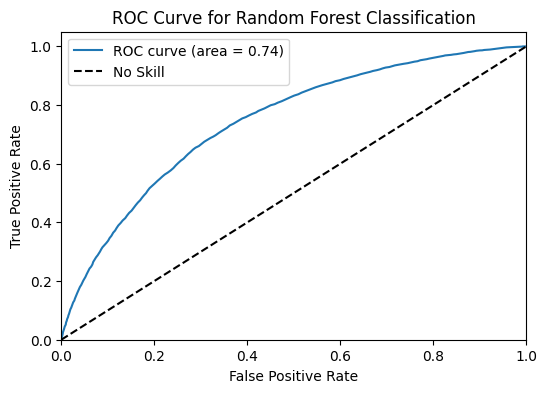

In [49]:
plt.figure(figsize=(6,4))
plt.plot(rfc_fpr, rfc_tpr, label='ROC curve (area = %0.2f)' % rfc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classification')
plt.legend()
plt.show()


In [50]:
predicted_probability = rf.predict_proba(test_df.drop(["CustomerID"], axis=1))[:,1] 

In [51]:
prediction_df = pd.DataFrame({'CustomerID': test_df[['CustomerID']].values[:, 0],
                             'predicted_probability': predicted_probability})

In [52]:
print(prediction_df.shape)
prediction_df.head(10)

(104480, 2)


,CustomerID,predicted_probability
0,O1W6BHP6RM,0.346667
1,LFR4X92X8H,0.233333
2,QM5GBIYODA,0.673333
3,D9RXTK2K9F,0.256667
4,ENTCCHR1LR,0.416667
5,7A88BB5IO6,0.763333
6,70OMW9XEWR,0.426667
7,EL1RMFMPYL,0.576667
8,4IA2QPT6ZK,0.553333
9,AEDCWHSJDN,0.463333


## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [53]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [54]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [55]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [56]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!

<h1> Thanks for watching this notebook! <h1>

## Author

<a href="https://www.linkedin.com/in/hi%E1%BA%BFu-nguy%E1%BB%85n-4444b5241">Hiếu Nguyễn</a>